## Step 1: Data Source
- The **Iris dataset** was first introduced by **Ronald Fisher in 1936** in the paper *The Use of Multiple Measurements in Taxonomic Problems*.
- It is a small, well-known dataset used for classification.
- The dataset consists of **150 observations** of **3 species**: *Iris-setosa, Iris-versicolor, and Iris-virginica*.
- Each flower has **4 features**: *sepal length, sepal width, petal length, and petal width*.
- This dataset is commonly used in **machine learning and statistics** to benchmark classification algorithms.

## Step 2: Identifying a Supervised Machine Learning Problem

### Problem Definition
- The goal of this project is to **classify iris plants** into one of **three species** based on their **sepal and petal dimensions**.
- The dataset consists of **four numerical features**:
  - **Sepal Length**
  - **Sepal Width**
  - **Petal Length**
  - **Petal Width**
- The target variable is **"Species"**, which can be one of:
  - *Iris-setosa*
  - *Iris-versicolor*
  - *Iris-virginica*

### Why Supervised Learning?
- This is a **classification problem** because we are predicting a **categorical label** (*species of iris*).
- The dataset is **labeled**, meaning each data point comes with its correct class.
- We will train models to learn patterns and generalize to unseen flower samples.

### Type of Supervised Learning
**Classification**  
- Since the target variable (species) has **discrete categories**, we will use **classification models**.
- Example **classification models**:
  - **Logistic Regression**
  - **K-Nearest Neighbors (KNN)**
  - **Support Vector Machine (SVM)**
  - **Random Forest**

### Why Not Regression?
- **Regression** predicts **continuous values** (e.g., price, temperature), while our labels are **categorical**.
- Since our goal is to classify iris species, **classification is the correct approach**.

### Project Scope
- Compare multiple classification models.
- Evaluate performance using **accuracy, precision, recall, and F1-score**.
- Perform **hyperparameter tuning** to optimize model performance.
- Analyze **feature importance** to determine which factors best distinguish species.

### Step 3.1: Inspect Dataset Structure
- Print the **data info, first few rows, and basic statistics**.
- Check for **missing values** or inconsistencies.

In [29]:
import pandas as pd
df = pd.read_csv("iris.data")
print(df.head())
print("Data Info:")
print(df.info())
print("\nHead of the data:")
print(df.head())
print("\nData Description:")
print(df.describe())
print("\nChecking for Missing Values:")
print(df.isnull().sum())
duplicates_count = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates_count}")

   5.1  3.5  1.4  0.2  Iris-setosa
0  4.9  3.0  1.4  0.2  Iris-setosa
1  4.7  3.2  1.3  0.2  Iris-setosa
2  4.6  3.1  1.5  0.2  Iris-setosa
3  5.0  3.6  1.4  0.2  Iris-setosa
4  5.4  3.9  1.7  0.4  Iris-setosa
Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   5.1          149 non-null    float64
 1   3.5          149 non-null    float64
 2   1.4          149 non-null    float64
 3   0.2          149 non-null    float64
 4   Iris-setosa  149 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.9+ KB
None

Head of the data:
   5.1  3.5  1.4  0.2  Iris-setosa
0  4.9  3.0  1.4  0.2  Iris-setosa
1  4.7  3.2  1.3  0.2  Iris-setosa
2  4.6  3.1  1.5  0.2  Iris-setosa
3  5.0  3.6  1.4  0.2  Iris-setosa
4  5.4  3.9  1.7  0.4  Iris-setosa

Data Description:
              5.1         3.5         1.4         0.2
count  149.000000  149

### Findings from Data Inspection:
- **No missing values** were found in the dataset.
- The dataset consists of **4 numerical features** and **1 categorical target** variable.
- The data is already in a clean format, so no major preprocessing is needed.
- **Column names are incorrect**
- **There are 3 duplicate rows**


#### Next Steps:
- Rename the columns
- Remove duplicates

In [31]:
df.columns = ["SepalLength", "SepalWidth", "PetalLength", "PetalWidth", "Species"]
df.drop_duplicates(inplace=True)
duplicates_count = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates_count}")
df.info()


Number of duplicate rows: 0
<class 'pandas.core.frame.DataFrame'>
Index: 146 entries, 0 to 148
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SepalLength  146 non-null    float64
 1   SepalWidth   146 non-null    float64
 2   PetalLength  146 non-null    float64
 3   PetalWidth   146 non-null    float64
 4   Species      146 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.8+ KB


#### Columns renamed
- Columns were renamed to "SepalLength", "SepalWidth", "PetalLength", "PetalWidth", "Species"
- Duplicates were removed

#### Next Steps:
- Proceed with **visualizing distributions** and checking for outliers.

### Step 3.2: Visualizing Data Distributions
- Plot **histograms** for each numerical feature to understand the data distribution.
- Generate a **pairplot** to visualize relationships between features.
- Use box-plots to analyze **the distribution of numerical features** and detect potential **outliers**.
- Create **scatter-plots** to examine **relationships between two numerical features**.

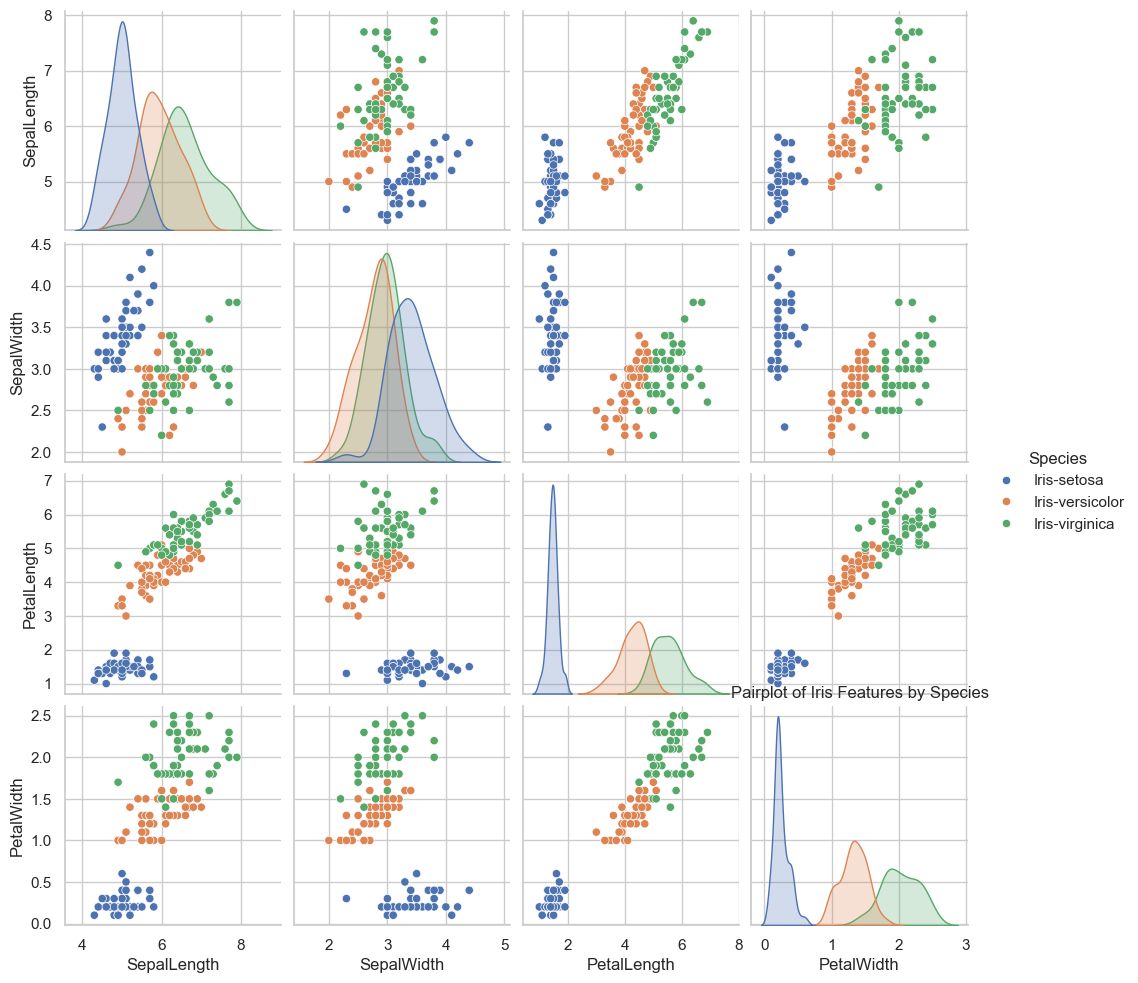

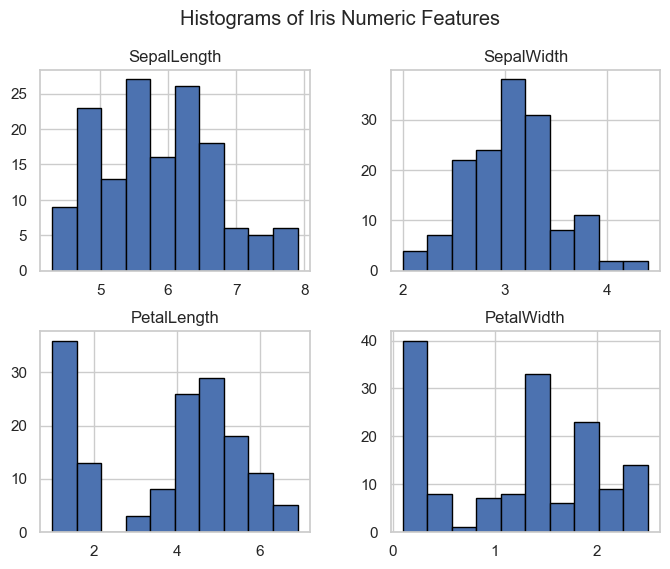

/var/folders/nm/1glpvyj96bj24hhpjpj3z1c80000gn/T/ipykernel_32002/3607081611.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["Species"], y=df[col], palette="Set2")
/var/folders/nm/1glpvyj96bj24hhpjpj3z1c80000gn/T/ipykernel_32002/3607081611.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["Species"], y=df[col], palette="Set2")
/var/folders/nm/1glpvyj96bj24hhpjpj3z1c80000gn/T/ipykernel_32002/3607081611.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["Species"], y=df[col], palette="Set2")
/var/folders/nm/1glpvyj96bj2

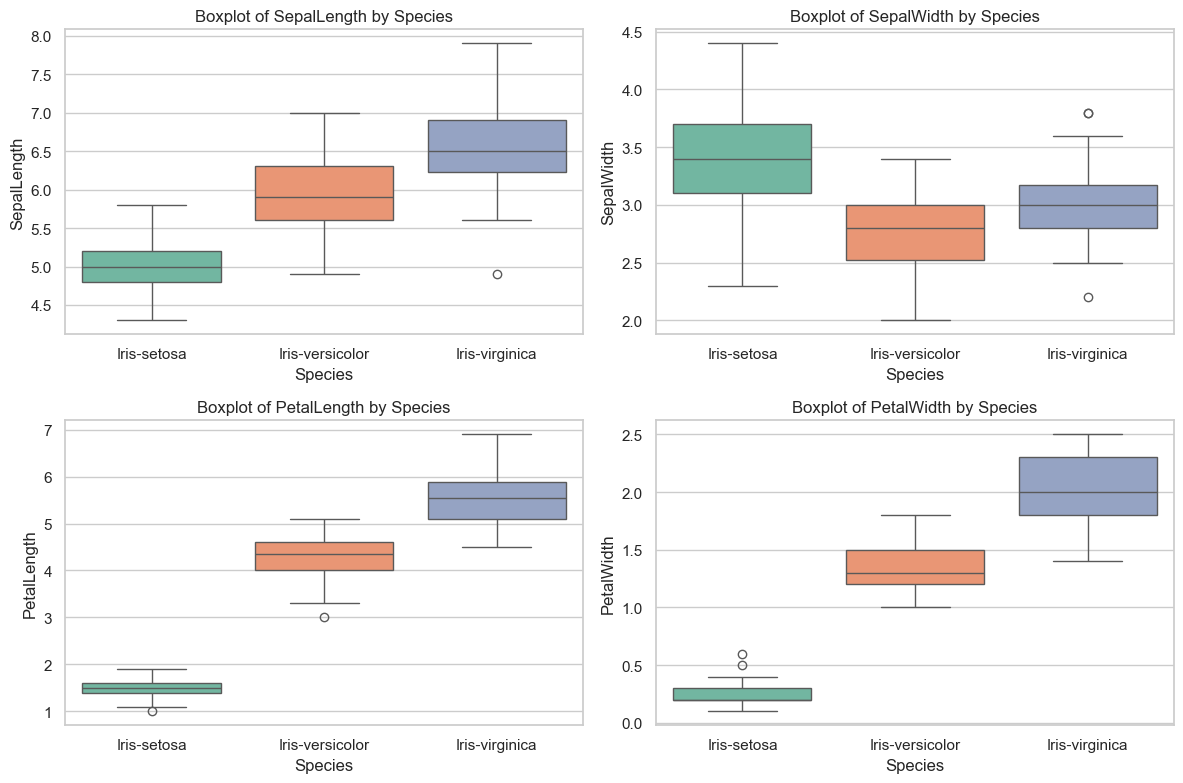

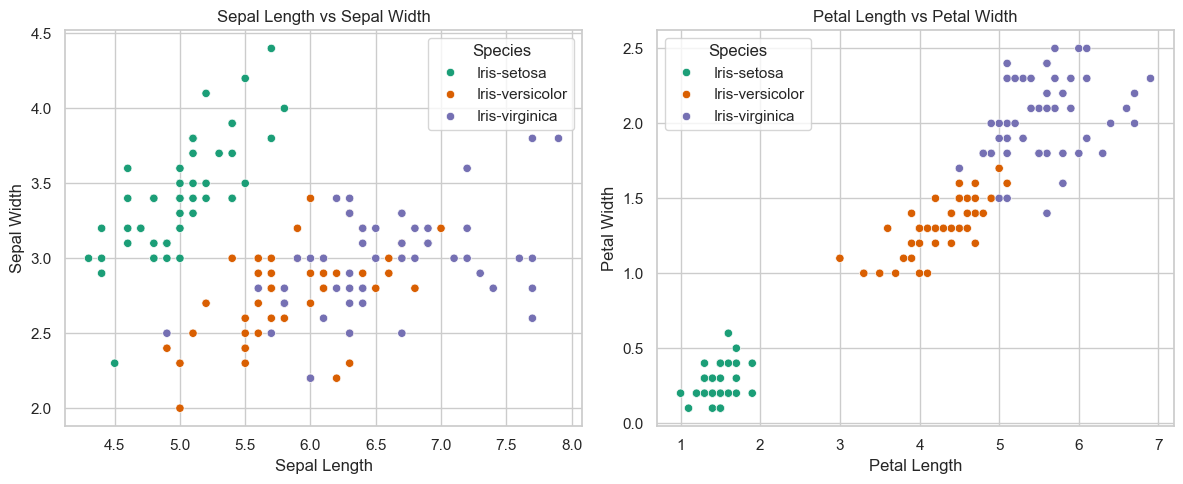

In [26]:
# Pairplot to visualize relationships between numerical features
sns.pairplot(df, hue="Species")
plt.title("Pairplot of Iris Features by Species")
plt.show()

# Histograms of each numerical feature
df.hist(figsize=(8,6), edgecolor='black')
plt.suptitle("Histograms of Iris Numeric Features")
plt.show()

# Boxplot for each numerical feature grouped by species
plt.figure(figsize=(12, 8))
for i, col in enumerate(df.drop(columns=["Species"]).columns, 1):
    plt.subplot(2, 2, i)  # Create a 2x2 grid of subplots
    sns.boxplot(x=df["Species"], y=df[col], palette="Set2")
    plt.title(f"Boxplot of {col} by Species")
    plt.xlabel("Species")
    plt.ylabel(col)

plt.tight_layout()
plt.show()

# Scatter plot of Sepal Length vs Sepal Width
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(x=df["SepalLength"], y=df["SepalWidth"], hue=df["Species"], palette="Dark2")
plt.title("Sepal Length vs Sepal Width")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")

# Scatter plot of Petal Length vs Petal Width
plt.subplot(1, 2, 2)
sns.scatterplot(x=df["PetalLength"], y=df["PetalWidth"], hue=df["Species"], palette="Dark2")
plt.title("Petal Length vs Petal Width")
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")

plt.tight_layout()
plt.show()

### Findings from Data Visualization:
- **Histograms** show that some features are **normally distributed**.
- **Pairplot** reveals that some species are more separable based on petal length/width.
- There is a visible **overlap** between *Iris-versicolor* and *Iris-virginica* in certain dimensions.
- From the box-plot we can see that there are **No extreme outliers** were detected and the feature values are within reasonable ranges.
- Scatter plots indicate that:
  - **Petal Length vs. Petal Width** shows clear separation between species.
  - **Sepal Length vs. Sepal Width** exhibits overlap between species, making classification more challenging.
  - **Petal measurements** appear to be more informative for distinguishing species.

#### Next Steps:
- Check for **correlations** between features to see if some can be removed or engineered.

### Step 3.4: Checking Feature Correlations
- Compute a **correlation matrix** to analyze relationships between numerical features.
- Identify **highly correlated features** that might be redundant.

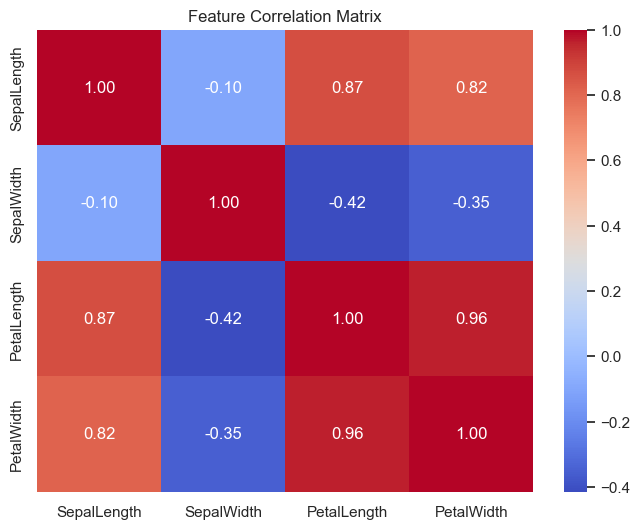

In [27]:
# Compute and visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(df.drop(columns=["Species"]).corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()

### Findings from Correlation Analysis:
- **Petal length and petal width** are highly correlated.
- **Sepal length and sepal width** show weak correlation.
- **No multicollinearity issues**, so no feature removal is needed.

#### Next Steps:
- Determine if **feature scaling** is necessary before model training.

### Step 3.5: Should We Scale the Features?
- Some ML models (like SVM, KNN) **perform better when data is scaled**.
- We will apply **standardization (Z-score normalization)** to ensure all features have **zero mean and unit variance**.

In [28]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.drop(columns=["Species"]))

# Convert back to DataFrame for readability
df_scaled = pd.DataFrame(X_scaled, columns=df.drop(columns=["Species"]).columns)

print("Scaled Features Preview:")
print(df_scaled.head())

Scaled Features Preview:
   SepalLength  SepalWidth  PetalLength  PetalWidth
0    -1.148356   -0.118060    -1.353964   -1.325063
1    -1.390542    0.344859    -1.410986   -1.325063
2    -1.511636    0.113399    -1.296943   -1.325063
3    -1.027262    1.270695    -1.353964   -1.325063
4    -0.542889    1.965072    -1.182901   -1.061466


### Findings from Feature Scaling:
- All numerical features have been **standardized**.
- Scaling ensures that models like **SVM and KNN** perform optimally.

#### Next Steps:
- Proceed with **model training and evaluation**.

### Summary of Exploratory Data Analysis (EDA)
✔ **No missing values** were found.
✔ **Feature distributions** were examined using histograms and pairplots.
✔ **No significant outliers** were detected.
✔ **Correlation analysis** showed that some features are strongly related, but none were removed.
✔ **Feature scaling** was applied to prepare for ML models.

Now, we move to **Step 4: Model Training & Evaluation**!

### Step 3.3: Splitting Data into Training and Testing Sets
- The dataset is split into **80% training data** and **20% testing data**.
- **Stratification** ensures that the distribution of classes remains balanced between training and testing sets.

In [34]:
# Train/Test Split
X = df.drop(columns=["Species"])
y = df["Species"]

# 80/20 split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\nTrain size: {len(X_train)}, Test size: {len(X_test)}")


Train size: 116, Test size: 30


### Findings from Train/Test Split
- The **train set contains 80%** of the data, while the **test set contains 20%**.
- The use of **stratified sampling** ensures that all species are **evenly represented** in both sets.

### Step 3.4: Training a Classification Model
- Train a **Random Forest Classifier** to predict the species of iris plants.
- Random Forest is chosen due to its **robustness** and **interpretability**.

In [35]:
# Train a Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict on test set
y_pred = rf.predict(X_test)

### Step 3.5: Evaluating the Model
- Use a **confusion matrix** to understand how well the model classifies each species.
- Compute a **classification report** to analyze precision, recall, and F1-score.

In [37]:
# Evaluate the Model
print("\n=== Confusion Matrix ===")
cm = confusion_matrix(y_test, y_pred)
print(cm)

print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred))


=== Confusion Matrix ===
[[10  0  0]
 [ 0  9  1]
 [ 0  1  9]]

=== Classification Report ===
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.90      0.90      0.90        10
 Iris-virginica       0.90      0.90      0.90        10

       accuracy                           0.93        30
      macro avg       0.93      0.93      0.93        30
   weighted avg       0.93      0.93      0.93        30



### Findings from Model Evaluation
- The **confusion matrix** shows correct and incorrect classifications.
- The **classification report** provides:
  - **Precision**: How many selected items are relevant?
  - **Recall**: How many relevant items are selected?
  - **F1-score**: Harmonic mean of precision and recall.
- This helps determine which species are easier or harder to classify.

### Step 3.6: Comparing Multiple Models
- Train different classification models to compare performance.
- Models include:
  - **Logistic Regression**
  - **K-Nearest Neighbors (KNN)**
  - **Support Vector Machine (SVM)**
  - **Random Forest**

In [38]:
# Define models
models = {
    "LogisticRegression": LogisticRegression(max_iter=1000, random_state=42),
    "KNN": KNeighborsClassifier(), 
    "SVC (Linear)": SVC(kernel='linear', random_state=42),
    "RandomForest": RandomForestClassifier(n_estimators=100, random_state=42)
}

# Function to train and evaluate each model
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    cm = confusion_matrix(y_test, y_pred)
    cr = classification_report(y_test, y_pred, zero_division=0)
    return cm, cr, y_pred

# Train and evaluate models
results = []

for name, clf in models.items():
    cm, cr, y_pred = evaluate_model(clf, X_train, y_train, X_test, y_test)
    print(f"\n=== {name} ===")
    print("Confusion Matrix:\n", cm)
    print("Classification Report:\n", cr)
    
    # Compute accuracy and F1-score
    from sklearn.metrics import accuracy_score, f1_score
    acc = accuracy_score(y_test, y_pred)
    f1_macro = f1_score(y_test, y_pred, average='macro')
    results.append((name, acc, f1_macro))

# Summary of model performance
print("\n=== Summary of Models ===")
for r in results:
    print(f"Model: {r[0]:>16}, Accuracy = {r[1]:.4f}, F1_macro = {r[2]:.4f}")


=== LogisticRegression ===
Confusion Matrix:
 [[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]
Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.90      0.95        10
 Iris-virginica       0.91      1.00      0.95        10

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30


=== KNN ===
Confusion Matrix:
 [[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]
Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00        10
 Iris-virginica       1.00      1.00      1.00        10

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00       

### Findings from Model Comparison
- We evaluated four classification models: **Logistic Regression, K-Nearest Neighbors (KNN), Support Vector Classifier (SVC), and Random Forest**.
- **Accuracy & F1-Score Results**:
  - **KNN & SVC (Linear)** achieved **100% accuracy**, meaning they classified all test samples correctly.
  - **Logistic Regression** performed very well with **96.7% accuracy**.
  - **Random Forest** had **93.3% accuracy**, with some misclassifications.

### Key Takeaways:
- **KNN and SVC performed the best**, achieving perfect classification.
- **Logistic Regression** was slightly behind but still had strong performance.
- **Random Forest had minor misclassifications**, particularly with Iris-versicolor and Iris-virginica.

### Confusion Matrix Analysis:
- **KNN and SVC (Linear)** had **zero misclassifications** across all classes.
- **Logistic Regression** misclassified **one sample of Iris-versicolor**.
- **Random Forest** misclassified **two samples**—one Iris-versicolor as Iris-virginica and vice versa.

### Step 3.7: Hyperparameter Tuning for Random Forest
- Perform **Grid Search Cross-Validation (GridSearchCV)** to optimize hyperparameters:
  - **n_estimators**: Number of trees in the forest.
  - **max_depth**: Maximum depth of each tree.
  - **min_samples_leaf**: Minimum number of samples per leaf.
- Grid search helps find the best combination of hyperparameters for improved accuracy.

In [40]:
# Define hyperparameter grid
param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [None, 2, 5],
    "min_samples_leaf": [1, 2, 4]
}

# Grid Search Cross-Validation
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=3,  # cross-validation splits
    scoring="accuracy"
)

grid_search.fit(X_train, y_train)

# Display best parameters
print("\n=== Hyperparameter Tuning for Random Forest ===")
print("Best Params:", grid_search.best_params_)

# Evaluate best model
best_rf = grid_search.best_estimator_
y_pred_best = best_rf.predict(X_test)

print("\nConfusion Matrix (Best RF):")
print(confusion_matrix(y_test, y_pred_best))
print("Classification Report (Best RF):")
print(classification_report(y_test, y_pred_best))

from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
scores = cross_val_score(rf, X, y, cv=5, scoring='accuracy')
print(f"Cross-validation scores: {scores}")
print(f"Mean CV accuracy: {scores.mean():.3f}")


=== Hyperparameter Tuning for Random Forest ===
Best Params: {'max_depth': None, 'min_samples_leaf': 1, 'n_estimators': 50}

Confusion Matrix (Best RF):
[[10  0  0]
 [ 0  9  1]
 [ 0  1  9]]
Classification Report (Best RF):
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.90      0.90      0.90        10
 Iris-virginica       0.90      0.90      0.90        10

       accuracy                           0.93        30
      macro avg       0.93      0.93      0.93        30
   weighted avg       0.93      0.93      0.93        30

Cross-validation scores: [0.96666667 1.         0.89655172 0.89655172 1.        ]
Mean CV accuracy: 0.952


### Findings from Hyperparameter Tuning
- The **best parameters** for the Random Forest model were found to be:
  - `max_depth`: **None** (no limit on tree depth)
  - `min_samples_leaf`: **1** (smallest possible leaf size)
  - `n_estimators`: **50** (number of trees in the forest)

- **Model Performance After Tuning:**
  - **Accuracy:** **93%** on the test set.
  - **Precision, Recall, and F1-score**:
    - **Iris-setosa**: **100% precision and recall**, meaning all samples were classified correctly.
    - **Iris-versicolor & Iris-virginica**: **90% precision and recall**, indicating some minor misclassification.

- **Confusion Matrix Analysis:**
  - The model **correctly classified** all **Iris-setosa** samples.
  - There was **one misclassification** each for **Iris-versicolor** and **Iris-virginica**.

- **Cross-Validation Results:**
  - **Mean Accuracy Across 5 Folds**: **95.2%**
  - Indicates that the model is performing consistently well across different training subsets.